# Data Exploration all'interno del Database (SQLserver) con 'SQLAlchemy'

## 1. Connessione al database

In [1]:
import pyodbc
from sqlalchemy import create_engine
import pandas as pd

In [2]:
engine = create_engine('mssql+pyodbc://LAPTOP-3P1FOCLU\SQLEXPRESS/covid_19?driver=SQL Server Native Client 11.0?Trusted_Connection=yes')

In [4]:
connection = engine.connect()

In [5]:
engine.table_names()

['covid_deaths', 'covid_vaccinations']

## 2. Testare la connessione

In [6]:
data = pd.read_sql_query('SELECT * FROM covid_deaths' , connection)

In [7]:
data.sample(10)

,iso_code,continent,location,day_of_year,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
6965,ARG,South America,Argentina,2020-08-21,45195777.0,329043.0,8159.0,6658.000,6730.0,213.0,...,3.803,"1,12",NaN,None,None,None,None,None,None,None
24923,IRL,Europe,Ireland,2020-04-22,4937796.0,16671.0,631.0,589.143,769.0,39.0,...,9.403,"0,93",131.0,"26,53",778,"157,56",None,None,None,None
85696,LUX,Europe,Luxembourg,2020-06-02,625976.0,4020.0,1.0,3.571,110.0,0.0,...,0.000,"0,75",2.0,"3,195",22,"35,145",None,None,None,None
31772,COM,Africa,Comoros,2021-03-25,869595.0,3687.0,5.0,4.286,146.0,0.0,...,0.000,"0,89",NaN,None,None,None,None,None,None,None
54474,POL,Europe,Poland,2020-12-05,37846605.0,1054273.0,12427.0,11525.714,19861.0,502.0,...,11.758,"0,76",NaN,None,19895,"525,675",None,None,None,None
21406,AZE,Asia,Azerbaijan,2020-06-02,10139175.0,5935.0,273.0,218.857,71.0,3.0,...,0.268,"1,45",NaN,None,None,None,None,None,None,None
63471,BLR,Europe,Belarus,2021-05-30,9449321.0,393807.0,1178.0,1111.714,2841.0,10.0,...,1.058,"0,87",NaN,None,None,None,None,None,None,None
18061,NER,Africa,Niger,2020-12-23,24206636.0,2876.0,73.0,73.571,89.0,0.0,...,0.041,"1,13",NaN,None,None,None,None,None,None,None
66678,OMN,Asia,Oman,2020-06-30,5106622.0,40070.0,1010.0,1096.571,176.0,7.0,...,1.007,"1,1",NaN,None,None,None,None,None,None,None
89735,IDN,Asia,Indonesia,2021-03-23,273523621.0,1471225.0,5297.0,5823.857,39865.0,154.0,...,0.581,"0,93",NaN,None,None,None,None,None,None,None


## 3. Elaborare una "Reflection"

In [8]:
from sqlalchemy import Table, MetaData

In [9]:
# Inizializzare l'oggetto di classe MetaData
metadata = MetaData()

In [10]:
# Fare il "reflect" di una tabella
covid_deaths = Table('covid_deaths', metadata, autoload=True, autoload_with=engine)

In [11]:
# Ispezionare le colonne
covid_deaths.columns.keys()

['iso_code',
 'continent',
 'location',
 'day_of_year',
 'population',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million']

In [12]:
repr(covid_deaths)

"Table('covid_deaths', MetaData(bind=None), Column('iso_code', NVARCHAR(length=255), table=<covid_deaths>), Column('continent', NVARCHAR(length=255), table=<covid_deaths>), Column('location', NVARCHAR(length=255), table=<covid_deaths>), Column('day_of_year', DATETIME(), table=<covid_deaths>), Column('population', FLOAT(precision=53), table=<covid_deaths>), Column('total_cases', FLOAT(precision=53), table=<covid_deaths>), Column('new_cases', FLOAT(precision=53), table=<covid_deaths>), Column('new_cases_smoothed', FLOAT(precision=53), table=<covid_deaths>), Column('total_deaths', INTEGER(), table=<covid_deaths>), Column('new_deaths', INTEGER(), table=<covid_deaths>), Column('new_deaths_smoothed', FLOAT(precision=53), table=<covid_deaths>), Column('total_cases_per_million', FLOAT(precision=53), table=<covid_deaths>), Column('new_cases_per_million', FLOAT(precision=53), table=<covid_deaths>), Column('new_cases_smoothed_per_million', FLOAT(precision=53), table=<covid_deaths>), Column('total

## 4. Prime query 

In [13]:
# Query semplice en "raw SQL"
statement = 'SELECT TOP(10) * FROM covid_deaths'
results = connection.execute(statement).fetchall()
results

[('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 7, 0, 0), 444919060.0, 20418116.0, 68143.0, 112026.0, 493667, 1425, 3220.714, 45891.754, 153.158, 251.79, '1109,566', '3,203', 7.239, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 8, 0, 0), 444919060.0, 20502181.0, 84065.0, 106419.286, 496659, 2992, 3161.571, 46080.698, 188.944, 239.188, '1116,291', '6,725', 7.106, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 9, 0, 0), 444919060.0, 20593535.0, 91354.0, 102879.857, 500809, 4150, 3112.714, 46286.026, 205.327, 231.233, '1125,618', '9,328', 6.996, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 10, 0, 0), 444919060.0, 20709189.0, 115654.0, 99781.571, 504216, 3407, 3053.857, 46545.97, 259.944, 224.269, '1133,276', '7,658', 6.864, None, None, None, None, None, 

In [14]:
# Query semplice in "pythonic" SQL
from sqlalchemy import select

statement_2 = select([covid_deaths])
results_2 = connection.execute(statement_2).fetchmany(size=10)
results_2

[('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 7, 0, 0), 444919060.0, 20418116.0, 68143.0, 112026.0, 493667, 1425, 3220.714, 45891.754, 153.158, 251.79, '1109,566', '3,203', 7.239, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 8, 0, 0), 444919060.0, 20502181.0, 84065.0, 106419.286, 496659, 2992, 3161.571, 46080.698, 188.944, 239.188, '1116,291', '6,725', 7.106, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 9, 0, 0), 444919060.0, 20593535.0, 91354.0, 102879.857, 500809, 4150, 3112.714, 46286.026, 205.327, 231.233, '1125,618', '9,328', 6.996, None, None, None, None, None, None, None, None, None),
 ('OWID_EUN', None, 'European Union', datetime.datetime(2021, 2, 10, 0, 0), 444919060.0, 20709189.0, 115654.0, 99781.571, 504216, 3407, 3053.857, 46545.97, 259.944, 224.269, '1133,276', '7,658', 6.864, None, None, None, None, None, 

In [15]:
# Selezionare una riga
first_row = results[0]

# Selezionare una colonna
first_row['location'] 

'European Union'

In [74]:
# Totali di morti per giorno in Italia
statement_3 = select([covid_deaths]).where(covid_deaths.columns.location == 'Italy')
result_3 = connection.execute(statement_3).fetchmany(10)

for result in result_3:
    print(result.location, result.day_of_year, result.total_deaths)

Italy 2020-01-31 00:00:00 None
Italy 2020-02-01 00:00:00 None
Italy 2020-02-02 00:00:00 None
Italy 2020-02-03 00:00:00 None
Italy 2020-02-04 00:00:00 None
Italy 2020-02-05 00:00:00 None
Italy 2020-02-06 00:00:00 None
Italy 2020-02-07 00:00:00 None
Italy 2020-02-08 00:00:00 None
Italy 2020-02-09 00:00:00 None


In [76]:
# Morti in un giorno in Italia, Argentina e Stati Uniti
states = ['Italy', 'Argentina', 'United States']
statement_4 = select([covid_deaths]).where(covid_deaths.columns.location.in_(states))
result_4 = connection.execute(statement_4).fetchall()
result_4_df = pd.DataFrame(result_4) 
result_4_df.columns = result_4[0].keys()
result_4_df.sample(10)

,iso_code,continent,location,day_of_year,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
1455,ITA,Europe,Italy,2021-04-03,60461828.0,3650247.0,21247.0,19684.857,110704.0,376.0,...,7.249,"0,88",3714.0,"61,427",32203,"532,617",None,None,None,None
963,USA,North America,United States,2021-04-05,331002647.0,30789814.0,77399.0,64711.286,556290.0,519.0,...,2.400,"1,05",8850.0,"26,737",36617,"110,624",None,None,None,None
1481,ITA,Europe,Italy,2021-04-29,60461828.0,4009208.0,14314.0,12609.000,120544.0,288.0,...,5.167,"0,9",2640.0,"43,664",21991,"363,717",None,None,None,None
769,USA,North America,United States,2020-09-23,331002647.0,6941824.0,39069.0,43696.286,202152.0,1055.0,...,2.274,"1,04",7865.0,"23,761",26519,"80,117",None,None,None,None
512,ARG,South America,Argentina,2020-01-01,45195777.0,NaN,NaN,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None
704,USA,North America,United States,2020-07-20,331002647.0,3839645.0,62107.0,67048.857,141881.0,563.0,...,2.455,"1,07",11297.0,"34,13",41190,"124,44",None,None,None,None
450,ARG,South America,Argentina,2020-11-21,45195777.0,1366182.0,7140.0,8762.286,36902.0,112.0,...,5.042,"0,87",NaN,None,None,None,None,None,None,None
1099,ITA,Europe,Italy,2020-04-12,60461828.0,156363.0,4092.0,3916.429,19899.0,431.0,...,9.479,"0,9",3343.0,"55,291",31190,"515,863",None,None,"6494,111","107,408"
221,ARG,South America,Argentina,2020-04-06,45195777.0,1554.0,103.0,104.857,48.0,4.0,...,0.079,"1,29",NaN,None,None,None,None,None,None,None
1425,ITA,Europe,Italy,2021-03-04,60461828.0,2999119.0,22845.0,18669.143,98974.0,339.0,...,4.726,"1,2",2475.0,"40,935",22632,"374,319",None,None,None,None


In [73]:
# Giorni con più di 500 morti in Italia in ordine decrescente
from sqlalchemy import and_, desc

statement_5 = select([covid_deaths]).where(
    and_(covid_deaths.columns.location == 'Italy',
         covid_deaths.columns.new_deaths >= 500
        )
)
statement_5 = statement_5.order_by(desc(covid_deaths.columns.new_deaths), covid_deaths.columns.day_of_year)
result_5 = connection.execute(statement_5).fetchall()
result_5_df = pd.DataFrame(result_5)
result_5_df.columns = result_5[0].keys()
result_5_df[['location', 'day_of_year', 'new_deaths']].head(10)

,location,day_of_year,new_deaths
0,Italy,2020-12-03,993
1,Italy,2020-03-27,919
2,Italy,2020-03-28,889
3,Italy,2020-12-10,887
4,Italy,2020-11-24,853
5,Italy,2020-12-15,846
6,Italy,2020-03-31,837
7,Italy,2020-11-27,827
8,Italy,2020-11-26,822
9,Italy,2020-12-04,814


In [19]:
# Numero di 'location' diverse
from sqlalchemy import func

statement_6 = func.count(covid_deaths.columns.location.distinct())
result_6 = connection.execute(statement_6).scalar()
result_6

229

In [82]:
# Numero di morti per paese
statement_7 = select([covid_deaths.columns.location, func.max(covid_deaths.columns.total_deaths)])
statement_7 = statement_7.group_by(covid_deaths.columns.location)

result_7 = connection.execute(statement_7).fetchall()
result_7_df = pd.DataFrame(result_7)
result_7_df.columns = result_7[0].keys()
result_7_df.sample(10)

,location,max_1
197,Congo,157.0
220,French Polynesia,NaN
89,Macao,NaN
8,South Korea,1975.0
208,Seychelles,46.0
121,India,351309.0
58,Turks and Caicos Islands,NaN
185,Tajikistan,90.0
172,Norway,785.0
194,Eritrea,14.0


## 5. Andamento della pandemia in Italia

In [65]:
#statement_3 = select([covid_deaths]).where(covid_deaths.columns.location == 'Italy')
#result_3 = connection.execute(statement_3)

# Trasformare la query in un DataFrame
df = pd.DataFrame(result_3)
df.columns = result_3[0].keys()
df.head()

,iso_code,continent,location,day_of_year,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,ITA,Europe,Italy,2020-01-31,60461828.0,2.0,2.0,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None
1,ITA,Europe,Italy,2020-02-01,60461828.0,2.0,0.0,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None
2,ITA,Europe,Italy,2020-02-02,60461828.0,2.0,0.0,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None
3,ITA,Europe,Italy,2020-02-03,60461828.0,2.0,0.0,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None
4,ITA,Europe,Italy,2020-02-04,60461828.0,2.0,0.0,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,None,None,None,None


<ipython-input-24-0ffc9bf45991>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels('Data', rotation=45)


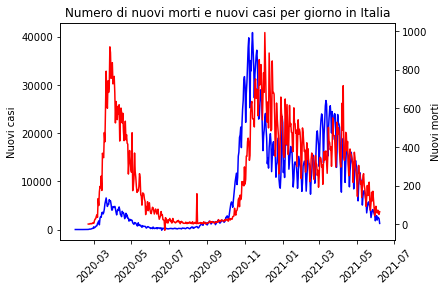

In [24]:
# Costruire un grafico
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df.day_of_year, df.new_cases, color='b')
ax.set_xticklabels('Data', rotation=45)
ax.set_ylabel('Nuovi casi')
ax2 = ax.twinx()
ax2.plot(df.day_of_year, df.new_deaths, color='r')
ax2.set_ylabel('Nuovi morti')
plt.title('Numero di nuovi morti e nuovi casi per giorno in Italia')
plt.show()

## 6. Unire tabelle

In [27]:
# Fare il reflecte della tabella 'covid_vaccinations'
metadata_1 = MetaData()
covid_vaccinations = Table('covid_vaccinations', metadata_1, autoload=True, autoload_with=engine)
covid_vaccinations.columns.keys()

['iso_code',
 'continent',
 'location',
 'day_of_year',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'stringency_index',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [51]:
# Fare una join per confrontare l'andamento di nuovi casi e nuovi vaccinati in Italia
statement_8 = select([covid_deaths.columns.location,
                      covid_deaths.columns.day_of_year,
                      covid_deaths.columns.new_cases,
                      covid_vaccinations.columns.new_vaccinations]).select_from(
    covid_deaths.join(covid_vaccinations, covid_deaths.columns.iso_code == covid_vaccinations.columns.iso_code)
)
statement_8 = statement_8.where(covid_deaths.columns.location == 'Italy')
result_8 = connection.execute(statement_8).fetchall()
df_1 = pd.DataFrame(result_8)
df_1.columns = result_8[0].keys()

In [52]:
# Salvare i dati estratti come file excel
df_1.to_excel(r'C:\Users\Santiago\Desktop\data_science\Projects\covid\join.xlsx', index=True)